### Problem Statement-

The objective of this task is to built a classification model to predict whether a loan would be approved or not. 
In this classification problem, we have to predict discrete values based on a given set of independent variable(s).

Classification can be of two types:

1. Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
2. Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

###### Hypothesis Generation
It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome.

Below are some factors which I think can effect the Loan Approval (dependent variable for this loan prediction problems):

1. Salary: Applicants with high income should have more chances of loan approval.
2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
4. Loan term: Loan for less time period and less amount should have higher chances of approval.
5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

There can be many other factors like No. of Dependents, Employment, Education, Marital Status,

In [1]:
# Loading packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                              # to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# data
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
# let's make copy of train and test data
train_orgiginal = train.copy()
test_original = test.copy()

In [4]:
# exploring the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

we have 12 independent variables and 1 target variable, i.e. Loan_status

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

we have 12 independent variables except target variable. We will predict the Loan_Status using the model built using the train data

In [9]:
# print data types for each variable
train.dtypes, test.dtypes

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object, Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object)

In [10]:
# lets look at the shapes
train.shape, test.shape

((614, 13), (367, 12))

### Exploratory Data Analysis (EDA) and Data Preprocessing

###### Univariate Analysis

1. Target Variable - Loan Status
It's a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# noralize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

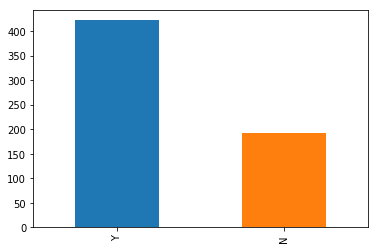

In [13]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422( 69% approx) people out of 614 was approved

Now lets visualize each variable separately.
* Categorical features: features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

2. Independent Variable (Categorical)

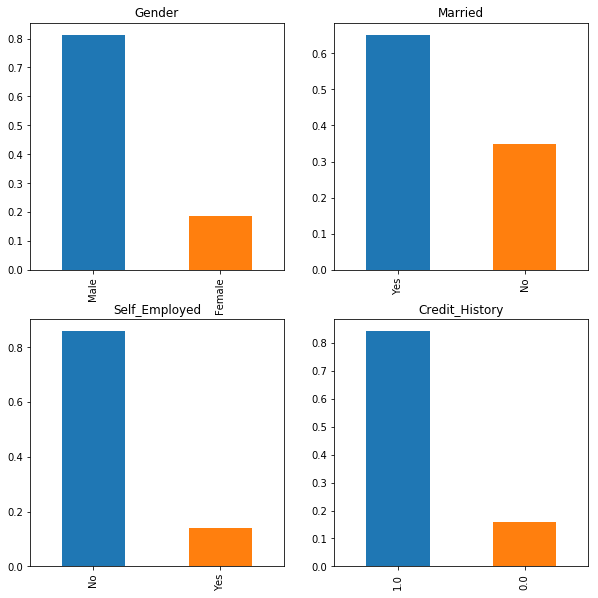

In [14]:
plt.figure(1)      

plt.subplot(221)   
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= "Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()


It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.


3. Independent Variable (Ordinal)

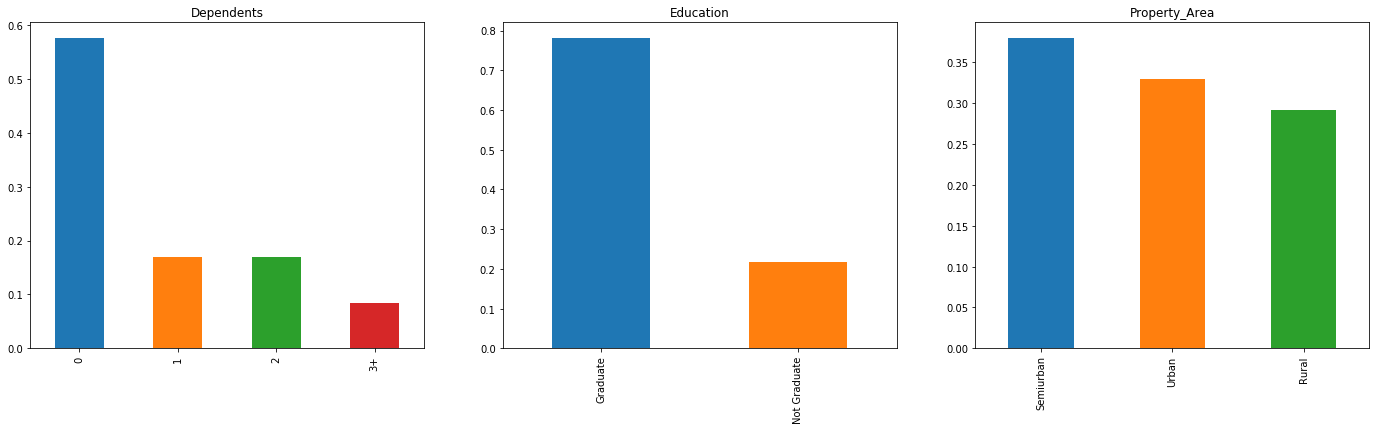

In [15]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6), title = "Dependents")

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

It can be inferred from the above bar plots that:

* most applicants don't have dependents.
* Around 80% of the applicants are Graduate.
* most applicants are from Semiurban area.

4. Independent Variable (Numerical)

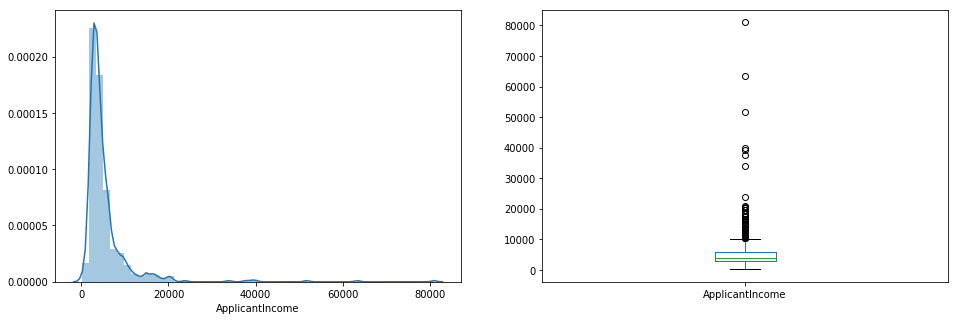

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

* It can be inferred from distribution of applicant Income is towardds left (Right skewed).
* boxplot shows the presence of a lot of outliers.

Let us segregate them by Education

Text(0.5, 0.98, '')

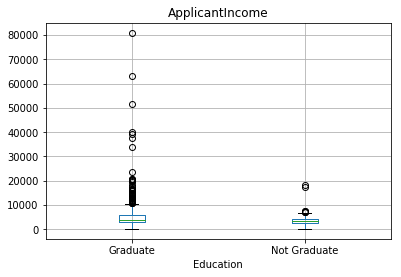

In [17]:
train.boxplot(column='ApplicantIncome',  by= 'Education')
plt.suptitle("")

higher number of graduates with very high incomes, which appearing to be outliers.

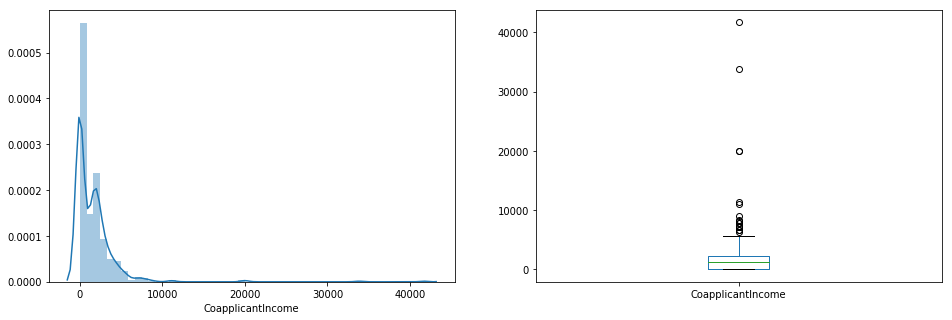

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

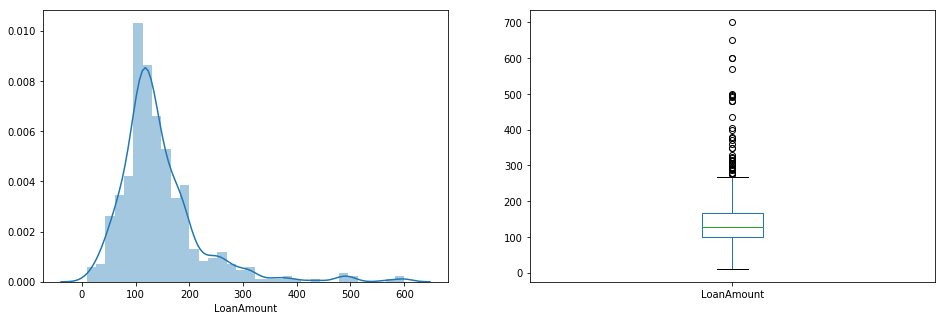

In [19]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()    # droping NA values
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

###### Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

1. Categorical Independent Variable vs Target Variable

In [20]:
# let us look at bar plot now which will give us the proportion of approved and unapproved loans.

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


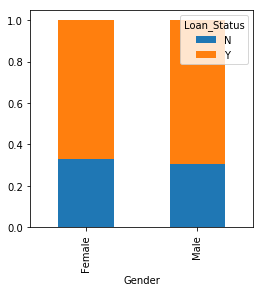

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

it can be inferred that proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now visualize remaining categorical variables vs target variable

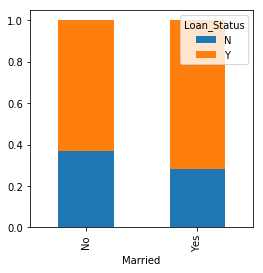

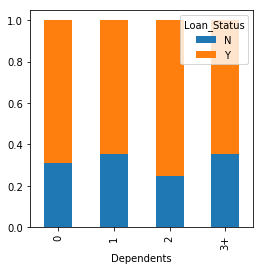

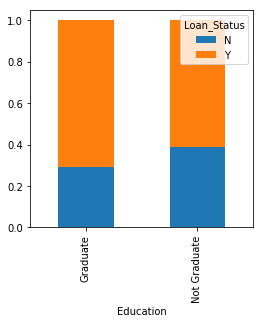

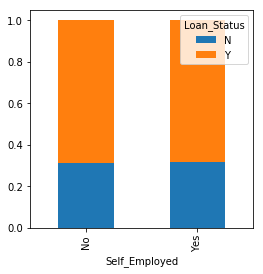

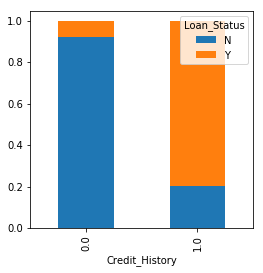

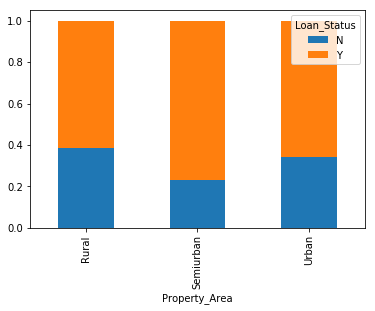

In [22]:
married = pd.crosstab(train['Married'], train['Loan_Status'])
dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
education = pd.crosstab(train['Education'], train['Loan_Status'])
self_employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
credit_history = pd.crosstab(train['Credit_History'], train['Loan_Status'])
property_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])


married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(4,4))
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.show()

inference:

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

2. Numerical Independent variable vs Target Variable

Now we find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

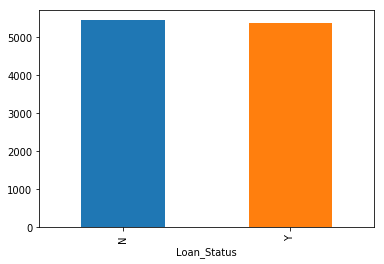

In [23]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

Here we don’t see any change in the mean income (y-axis). So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [24]:
bins = [0,2500,4500,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(df['ApplicantIncome'], bins, labels=group)

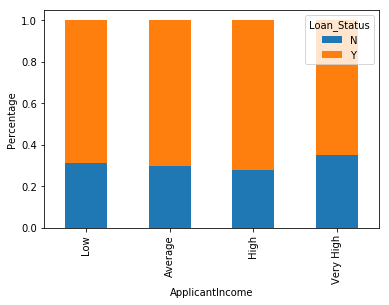

In [25]:
income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

It can be inferred that Applicant Income doesn't affect chances of loan approval which contradicts our hypothesis

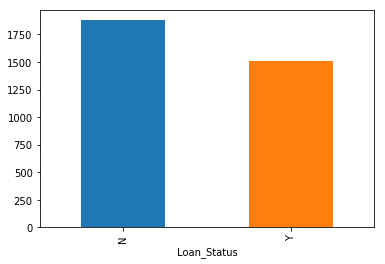

In [26]:
# analyzing coapplicant income
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

In [27]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)

In [28]:
coapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])
coapplicantIncome_bin

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,15
Average,46,123
High,24,53


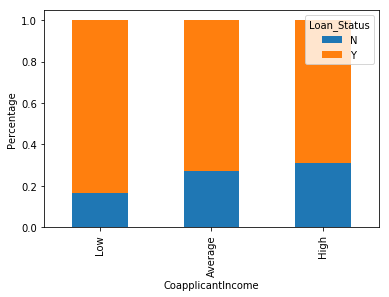

In [29]:
coapplicantIncome_bin.div(coapplicantIncome_bin.sum(1).astype(float), axis= 0).plot(kind ='bar', stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [30]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

In [31]:
bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']
train['TotalIncome_bin'] = pd.cut(train['Total_Income'], bins, labels = group)

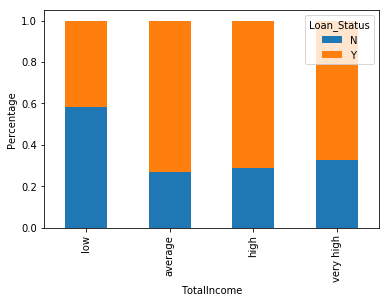

In [32]:
totalIncome_bin = pd.crosstab(train['TotalIncome_bin'], train['Loan_Status'])
totalIncome_bin.div(totalIncome_bin.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True)
plt.xlabel('TotalIncome')
plt.ylabel('Percentage')
plt.show()

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [33]:
# analyze Loan amount variable
bins = [0,100,200,700]
group = ['low','average','high']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

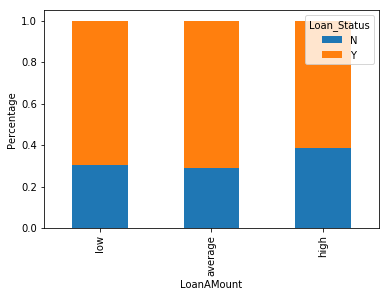

In [34]:
loanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
loanAmount_bin.div(loanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('LoanAMount')
plt.ylabel('Percentage')
plt.show()

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [35]:
train = train.drop(['Income_bin', 'CoapplicantIncome_bin','TotalIncome_bin', 'LoanAmount_bin', 'Total_Income'], axis=1)

In [36]:
train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

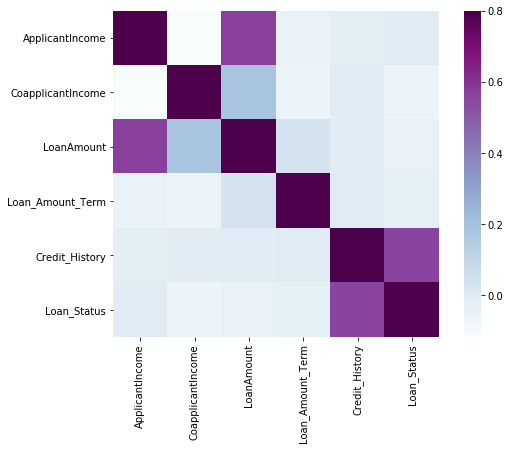

In [38]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu');

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

###### Missing Value and Outlier 

In [39]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [41]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [42]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [43]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
# Let’s fill all the missing values in the test dataset too

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [46]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

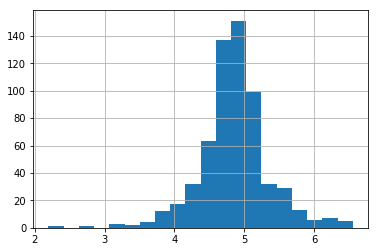

In [47]:
train['LoanAmount_log'].hist(bins=20)
plt.show()

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

### Evaluation Metrics for Classification Problems

### Model Building
###### Logistic Regression

In [48]:
# Let's drop the Loan_ID variable as it don't have any effect on the loan status.

train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [49]:
# Now we will use scikit-learn (sklearn) for modelling
# sklearn requires the target variable in a separate dataset. 
# So, we will drop target variable form the train data set and save it in another dataset.

x = train.drop('Loan_Status',1)
y_target = train.Loan_Status

In [50]:
# Lst's make dummy variables for categorical variables

# Gender 
x_dummies = pd.get_dummies(x)
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? 
One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_cv, y_train, y_cv = train_test_split(x_dummies, y_target, test_size = 0.3)

In [53]:
# Lets fit logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
# Here the C parameter represents inverse of regularization strength. 
# Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. 
# Smaller values of C specify stronger regularization.

In [57]:
# let's predict Loan_Status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)

In [58]:
accuracy_score(y_cv, pred_cv)

0.7783783783783784

#### Our Predictions are 80% accurate.

In [59]:
# let's make predictions for the test dataset.
pred_test = model.predict(test_dummies)

In [60]:
# let's import submission file 
submission  = pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')

In [61]:
# We only need the Loan_ID and the corresponding Loan_Status for the final submission.
# we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.
submission.head()

,Loan_ID,Loan_Status


In [62]:
submission['Loan_Status'] = pred_test

In [63]:
submission['Loan_ID'] = test_original['Loan_ID']

In [64]:
# Lets convert 1 and 0 to Y and N because we need predictions in Y and N.
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [65]:
pd.DataFrame(submission, columns= ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

#### We got an accuracy of 0.7847

###### Feature Engineering 

We will create the following three new features:
1. Total Income: we will combine Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
2. EMI: People who have high EMI's might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
3. Balance Income: Income left after EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [66]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

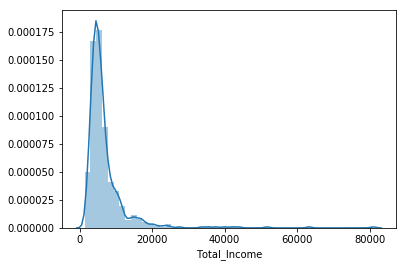

In [67]:
# distribution of Total Income.
sns.distplot(train['Total_Income']);

In [68]:
# distribution is right skewed. So, let's take the log transformation to make teh distribution normal.
train['Total_Income_log'] = np.log(train['Total_Income'])

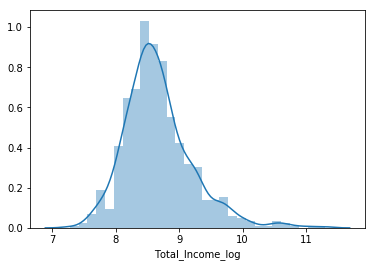

In [69]:
sns.distplot(train['Total_Income_log']);

In [70]:
# now distribution looks much closer to normal and effect of extreme values has been significantly subsided.
test['Total_Income_log'] = np.log(test['Total_Income'])

In [71]:
# let's create EMI feature now.
train['EMI'] = train['LoanAmount']/ train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

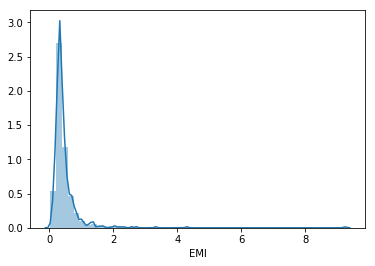

In [72]:
# lets check distribution of EMI Variable
sns.distplot(train['EMI']);

In [73]:
# lets create Balance Income feature
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

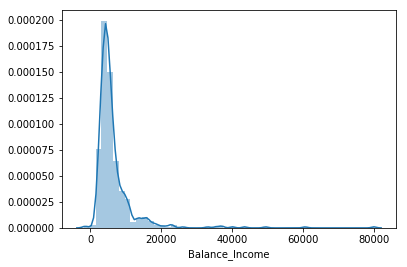

In [74]:
sns.distplot(train['Balance_Income']);

In [75]:
# let's drop the variables which used to create these new features.
# Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 
# We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [76]:
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

##### Logistic Regression with Stratified K-fold Cross Validation

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
i =1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(x_dummies, y_target):
    print('\n{} of kfold {}' .format(i, kf.n_splits))
    xtr, xvl = x_dummies.loc[train_index], x_dummies.loc[test_index]
    ytr, yvl = y_target[train_index], y_target[test_index]
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


##### Decision tree with K-fold cv

In [91]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(x_dummies,y_target):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_dummies.loc[train_index],x_dummies.loc[test_index]     
    ytr,yvl = y_target[train_index],y_target[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.6451612903225806

2 of kfold 5
accuracy_score 0.6854838709677419

3 of kfold 5
accuracy_score 0.6639344262295082

4 of kfold 5
accuracy_score 0.6639344262295082

5 of kfold 5
accuracy_score 0.7049180327868853


##### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)

for train_index, test_index in kf.split(x_dummies, y_target):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x_dummies.loc[train_index], x_dummies.loc[test_index]
    ytr, yvl = y_target[train_index], y_target[test_index]
    model = RandomForestClassifier(random_state=1, max_depth= 10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)


1 of kfold 5
accuracy_score 0.782258064516129

1 of kfold 5
accuracy_score 0.7661290322580645

1 of kfold 5
accuracy_score 0.7704918032786885

1 of kfold 5
accuracy_score 0.7540983606557377

1 of kfold 5
accuracy_score 0.7950819672131147


##### Feature Importance:

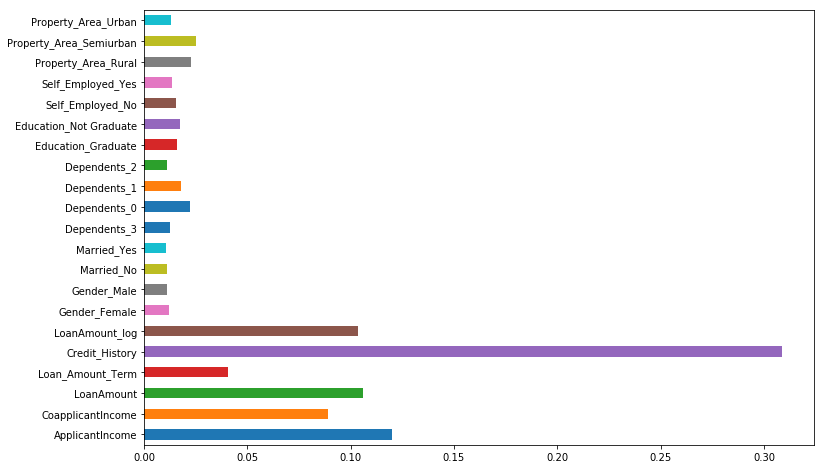

In [102]:
importances=pd.Series(model.feature_importances_, index=x_dummies.columns) 
importances.plot(kind='barh', figsize=(12,8));